<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/16_Text_Summarization_with_Pretrained_Encoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Summarization with Pretrained Encoders(EMNLP)

## Background

논문에서 다루고 있는 task는 자연어 요약임.
: 핵심 내뇽과 의미를 보존하면서 간결하고 유창한 요약을 만드는 작업 


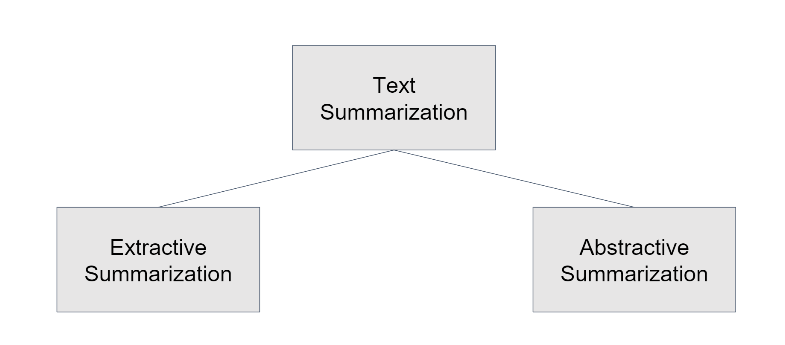

요약은 두 가지로 나눌 수 있음. 
1. Extractive Summarization
    - 문서에서 중요한 문장이나 구를 찾아내고 발췌하는 작업 

2. Abstractive Summarization
    - 주어진 문서를 이해하고 짧고 간결한 새로운 문장을 생성하는 작업

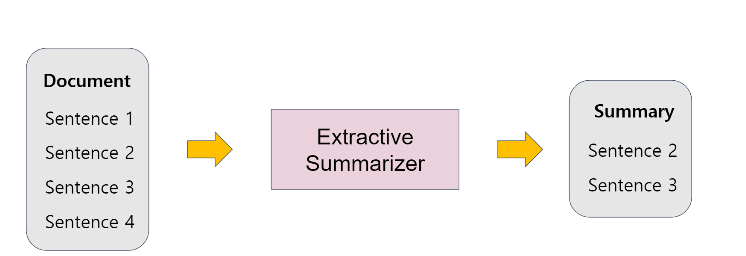

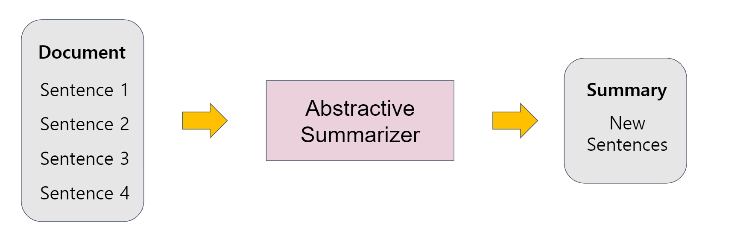

## Introduction 

- Pretrained Encoders 
    - BERT와 같은 Pretrained Language Model들은 많은 NLP 작업에서 좋은 성능을 보여줌
    


- 요약에는 자연어에 대한 넓은 이해를 필요로 함 
    - 문장을 넘어 문서 수준의 이해가 필요
    
- BERT는 문장단위로 사전학습됨.
    1. 추출요약문에 포함시킬 요약문을 찾기위해서 여러 문장에 대한 representation이 필요함. 하지만, 기존 BERT는 입력문서에 대한 하나의 representation만 얻을 수 있음.
    2. 인코더와 디코더간의 차이 
        - fine tuning 하기 위해 인코더는 사전학습 되어있으며 요약문 생성을 위한 디코더는 랜덤하게 초기화되어있다. 

- 논문에서는, 위 문제를 해결할 수 있는 새로운 문서 수준의 요약 모델을 제안


    

## Fine-tuning BERT for Summarization


### BERTSUM

제안하는 모델의 아키텍처 

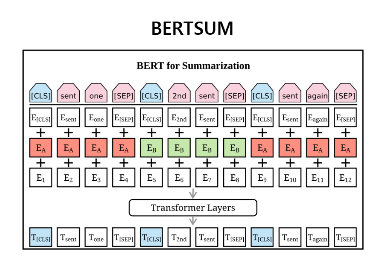

1. 각 문장의 시작에 [CLS] 토큰을 삽입
    - 개별 문장의 representation을 얻을 수 있음. 
2. segmentation embedding
    - 입력된 여러 문장을 구분하기 위해 수행



##BERTSumExt 

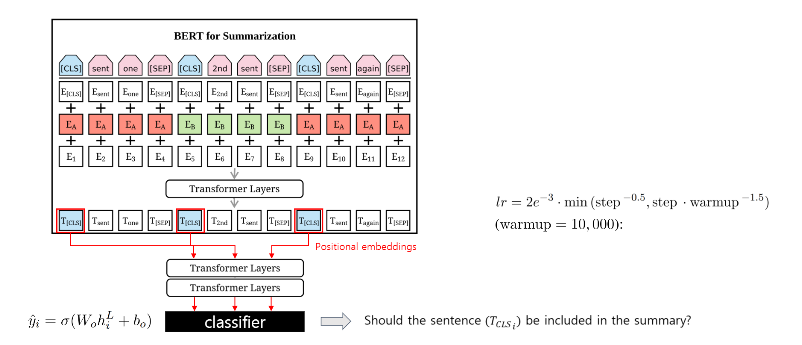

- BERTSumExt는 BERTSum의 출력토큰 중에 [CLS] 토큰만을 선택하여 두 개의 레이어로 구성된 트랜스포머 레이어에 입력된다. 

- 그 후에 바이너리 classifier를 통해 해당 토큰이 요약문에 포함이 될 수 있는지 분류함




## BERTSumAbs

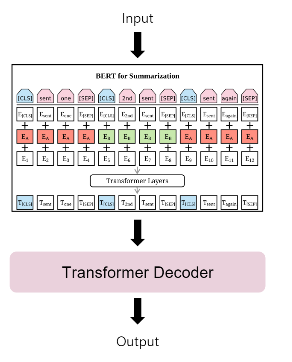

- BERTSUM은 인코더로, 랜덤 초기화된 decoder와 조합해야함
- decoder는 사전학습된 encoder와는 다르게 랜덤하게 초기화되어있음.
- 이 차이는 학습을 불안정하게 만든다.
- 이를 해결하기 위해 encoder와 decoder의 옵티마이저의 순을 분리하는 전략을 활용한
- 기본적으로 인코더의 learning-rate를 보다 작게 사용함.
- 

## BERTSumExtAbs

논문에서는 앞의 두 모델을 결합하여 보다 높은 성능을 낼 수 있는 모델을 제안

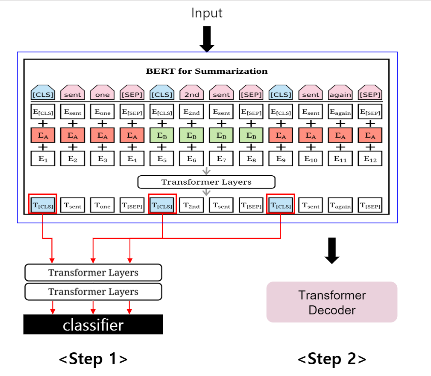

1. extractive summarization task를 수행한 후 
2. BERTSum Encoder 부분만을 가지고와서 abstactive summarization task를 수행함 


## Experiments & Results 

BERTSum 모델의 3가지 실험과 결과 

실험 모델 : BERTSumExt , BERTSumAbs, BERTSumExtAbs

실험 데이터 셋의 형태 : 
1. 기사의 원문과 기사의 요약문으로 이루어져있음.
2. 요약 모델의 input에는 기사의 원문이 들어가고 output에는 요약문이 출력된다. 
3. 기사 요약문은 모두 사람이 요약한 요약문으로 생성요약임.
4. 사람이 요약한 요약문은 gold summary 라고 한다. 
데이터 셋:
1. CNN/DailyMail - 몇개의 bullet point 
2. NYT - 뉴욕타임즈 기사 요약문 
3. XSum - BBC 기사 한 줄 요약



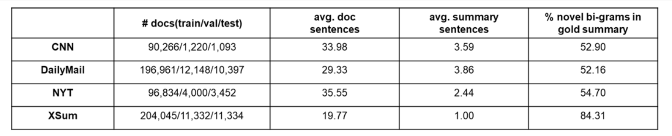

novel bi-grams in gold summary : 
1. 주어진 요약문에서 새로운 단어가 나타나는 비율 
2. 비중이 클수록 BERTSumExt 보다 , BERTSumAbs나 BERTSumExtAbs의 성능이 더 좋을 것으로 예상됨.

##요약 task의 성능평가 지표 : ROUGE 

rouge는 (gold summary) y와 모델 요약문 y_hat 사이에 겹치는 단어 or 구(phrase)의 수로 모델을 판단.

1. Precision
    - 일치하는 단어 수 / 모델 요약문 단어 수 

2. Recall
    - 일치하는 단어 수 / 정답 요약문 단어 수 

3. F1-score
    - recision * recall / precision + recall

[예시]
- 정답 ) the cat was under the chair
- 모델 ) the cat found under the bed 

1. Precision = 5/7
2. Recall = 5/6
3. F1-score = 10/13


1. precision
    - 모델 요약문에 오답 단어가 들어가면 precision 감소
    - 간결한 문장을 선호하는 지표 

2. recall 
    - 모델 요약문에 오답 단어가 들어가도 수치 변동 없음
    - 모델이 만든 요약문 안에 정답 요약문의 단어가 최대한 많이 들어있어야 유리
    - 많은 정보량을 선호하는 지표 

3. F1-score
    - 들어가야하는 내용은 다 들어가면서 간결한 문장인지 평가
    1. precision : 간결한 문장 선호
    2. recall : 많은 정보량을 선호



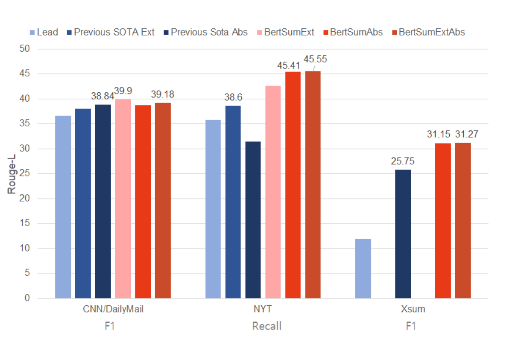

## Conclusion

1. BERT 모델을 요약 task에 적용
2. document-level encoder 소개 
3. 추출요약과 생성요약 모두를 반영한 general framework를 제안 (BERTSumEXTABS)
4. 실험 데이터셋에 대하여 SOTA를 달성 (automatic, human-based 모두)

